# Transfer Learning

Most of the time you won't want to train a whole convolutional network yourself. Modern ConvNets training on huge datasets like ImageNet take weeks on multiple GPUs. 
> Instead, most people use a pretrained network either as a fixed feature extractor, or as an initial network to fine tune. 

In this notebook, you'll be using [VGGNet](https://arxiv.org/pdf/1409.1556.pdf) trained on the [ImageNet dataset](http://www.image-net.org/) as a feature extractor. Below is a diagram of the VGGNet architecture, with a series of convolutional and maxpooling layers, then three fully-connected layers at the end that classify the 1000 classes found in the ImageNet database.

<img src="notebook_ims/vgg_16_architecture.png" width=700px>

VGGNet is great because it's simple and has great performance, coming in second in the ImageNet competition. The idea here is that we keep all the convolutional layers, but **replace the final fully-connected layer** with our own classifier. This way we can use VGGNet as a _fixed feature extractor_ for our images then easily train a simple classifier on top of that. 
* Use all but the last fully-connected layer as a fixed feature extractor.
* Define a new, final classification layer and apply it to a task of our choice!

You can read more about transfer learning from [the CS231n Stanford course notes](http://cs231n.github.io/transfer-learning/).

---

## Flower power

Here we'll be using VGGNet to classify images of flowers. We'll start, as usual, by importing our usual resources. And checking if we can train our model on GPU.

### Download Data

Download the flower data from [this link](https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip), save it in the home directory of this notebook and extract the zip file to get the directory `flower_photos/`. **Make sure the directory has this exact name for accessing data: flower_photos**.

In [8]:
!pwd

/Users/romeo/myProjects/education/udacity_deeplearning/deep-learning-v2-pytorch/transfer-learning


In [6]:
!wget https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip

--2020-02-08 18:07:31--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/September/5baa60a0_flower-photos/flower-photos.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.114.45
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.114.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229734282 (219M) [application/zip]
Saving to: ‘flower-photos.zip’

flower-photos.zip   100%[===================>] 219.09M  10.5MB/s    in 29s     

2020-02-08 18:08:01 (7.47 MB/s) - ‘flower-photos.zip’ saved [229734282/229734282]



In [7]:
!ls

Transfer_Learning_Exercise.ipynb flower-photos.zip
Transfer_Learning_Solution.ipynb notebook_ims


In [9]:
!unzip flower-photos.zip

Archive:  flower-photos.zip
   creating: flower_photos/
  inflating: flower_photos/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/flower_photos/
  inflating: __MACOSX/flower_photos/._.DS_Store  
  inflating: flower_photos/LICENSE.txt  
   creating: flower_photos/test/
  inflating: flower_photos/test/.DS_Store  
   creating: __MACOSX/flower_photos/test/
  inflating: __MACOSX/flower_photos/test/._.DS_Store  
   creating: flower_photos/test/daisy/
  inflating: flower_photos/test/daisy/14332947164_9b13513c71_m.jpg  
  inflating: flower_photos/test/daisy/14333681205_a07c9f1752_m.jpg  
  inflating: flower_photos/test/daisy/14350958832_29bdd3a254.jpg  
  inflating: flower_photos/test/daisy/14354051035_1037b30421_n.jpg  
  inflating: flower_photos/test/daisy/14372713423_61e2daae88.jpg  
  inflating: flower_photos/test/daisy/14399435971_ea5868c792.jpg  
  inflating: flower_photos/test/daisy/14402451388_56545a374a_n.jpg  
  inflating: flower_photos/test/daisy/14421389519_d5fd353eb4.jpg

  inflating: flower_photos/test/dandelion/17344936845_fec4d626b7.jpg  
  inflating: flower_photos/test/dandelion/17346385582_7ba433dbbe.jpg  
  inflating: flower_photos/test/dandelion/17367866236_61abd4d243_n.jpg  
  inflating: flower_photos/test/dandelion/17388674711_6dca8a2e8b_n.jpg  
  inflating: flower_photos/test/dandelion/17388697431_0d84c427d1_n.jpg  
  inflating: flower_photos/test/dandelion/17420983523_2e32d70359.jpg  
  inflating: flower_photos/test/dandelion/17457028309_95514c8d02_n.jpg  
  inflating: flower_photos/test/dandelion/17466568484_9128287148.jpg  
  inflating: flower_photos/test/dandelion/17482158576_86c5ebc2f8.jpg  
  inflating: flower_photos/test/dandelion/17574213074_f5416afd84.jpg  
  inflating: flower_photos/test/dandelion/17619402434_15b2ec2d79.jpg  
  inflating: flower_photos/test/dandelion/17649230811_9bdbbacb8c.jpg  
  inflating: flower_photos/test/dandelion/17747738311_5014b1f77f.jpg  
  inflating: flower_photos/test/dandelion/17821459748_873101edd0_m.jp

  inflating: flower_photos/test/roses/16545641666_2781e542a0_m.jpg  
  inflating: flower_photos/test/roses/16552686350_db8db55cd2.jpg  
  inflating: flower_photos/test/roses/16643944275_3cd4cd966c.jpg  
  inflating: flower_photos/test/roses/16666836810_216f50e9c3_m.jpg  
  inflating: flower_photos/test/roses/16670921315_0fc48d7ab2_n.jpg  
  inflating: flower_photos/test/roses/16691277899_9433f39155_n.jpg  
  inflating: flower_photos/test/roses/16772483324_09f24813a1_n.jpg  
  inflating: flower_photos/test/roses/16903172207_2cd7aca66a.jpg  
  inflating: flower_photos/test/roses/16961613890_695b36aab2_m.jpg  
  inflating: flower_photos/test/roses/17040847367_b54d05bf52.jpg  
  inflating: flower_photos/test/roses/17051448596_69348f7fce_m.jpg  
  inflating: flower_photos/test/roses/17062080069_36ac7907d2_n.jpg  
  inflating: flower_photos/test/roses/17077876795_6dd1b03f54_m.jpg  
  inflating: flower_photos/test/roses/17090993740_fcc8b60b81.jpg  
  inflating: flower_photos/test/roses/171582

  inflating: flower_photos/test/sunflowers/23247483352_0defc7a6dc_n.jpg  
  inflating: flower_photos/test/sunflowers/23286304156_3635f7de05.jpg  
  inflating: flower_photos/test/sunflowers/23356825566_f5885875f2.jpg  
  inflating: flower_photos/test/sunflowers/23645265812_24352ff6bf.jpg  
  inflating: flower_photos/test/sunflowers/23894449029_bf0f34d35d_n.jpg  
   creating: flower_photos/test/tulips/
  inflating: flower_photos/test/tulips/14487762578_baba13d16a_m.jpg  
  inflating: flower_photos/test/tulips/14487943607_651e8062a1_m.jpg  
  inflating: flower_photos/test/tulips/14491997336_36ba524713.jpg  
  inflating: flower_photos/test/tulips/14651383746_419dc73634_m.jpg  
  inflating: flower_photos/test/tulips/14651385476_7ccb20e594_m.jpg  
  inflating: flower_photos/test/tulips/14671196461_b725727229_m.jpg  
  inflating: flower_photos/test/tulips/14674067742_73c2602aa6_m.jpg  
  inflating: flower_photos/test/tulips/14674071872_2df55466d5_m.jpg  
  inflating: flower_photos/test/tulips

  inflating: flower_photos/train/daisy/11023277956_8980d53169_m.jpg  
  inflating: flower_photos/train/daisy/11124324295_503f3a0804.jpg  
  inflating: flower_photos/train/daisy/1140299375_3aa7024466.jpg  
  inflating: flower_photos/train/daisy/11439894966_dca877f0cd.jpg  
  inflating: flower_photos/train/daisy/1150395827_6f94a5c6e4_n.jpg  
  inflating: flower_photos/train/daisy/11642632_1e7627a2cc.jpg  
  inflating: flower_photos/train/daisy/11834945233_a53b7a92ac_m.jpg  
  inflating: flower_photos/train/daisy/11870378973_2ec1919f12.jpg  
  inflating: flower_photos/train/daisy/11891885265_ccefec7284_n.jpg  
  inflating: flower_photos/train/daisy/12193032636_b50ae7db35_n.jpg  
  inflating: flower_photos/train/daisy/12348343085_d4c396e5b5_m.jpg  
  inflating: flower_photos/train/daisy/12585131704_0f64b17059_m.jpg  
  inflating: flower_photos/train/daisy/12601254324_3cb62c254a_m.jpg  
  inflating: flower_photos/train/daisy/1265350143_6e2b276ec9.jpg  
  inflating: flower_photos/train/daisy

  inflating: flower_photos/train/daisy/2619413565_61a6cd3ac9_m.jpg  
  inflating: flower_photos/train/daisy/2621723097_736febb4a4_n.jpg  
  inflating: flower_photos/train/daisy/2627815904_919373e7f5.jpg  
  inflating: flower_photos/train/daisy/2632216904_274aa17433.jpg  
  inflating: flower_photos/train/daisy/2635314490_e12d3b0f36_m.jpg  
  inflating: flower_photos/train/daisy/2641151167_3bf1349606_m.jpg  
  inflating: flower_photos/train/daisy/2641979584_2b21c3fe29_m.jpg  
  inflating: flower_photos/train/daisy/2642408410_61545fdc83_n.jpg  
  inflating: flower_photos/train/daisy/2646438199_b309cffd65_n.jpg  
  inflating: flower_photos/train/daisy/2649404904_b7a91991bb_n.jpg  
  inflating: flower_photos/train/daisy/2666572212_2caca8de9f_n.jpg  
  inflating: flower_photos/train/daisy/267148092_4bb874af58.jpg  
  inflating: flower_photos/train/daisy/2713919471_301fcc941f.jpg  
  inflating: flower_photos/train/daisy/2812442552_3eed5fb9f2_m.jpg  
  inflating: flower_photos/train/daisy/2828

  inflating: flower_photos/train/daisy/4837182901_69a6cc782b_n.jpg  
  inflating: flower_photos/train/daisy/483886997_27ee798327.jpg  
  inflating: flower_photos/train/daisy/4851353993_2cbbbd1040_n.jpg  
  inflating: flower_photos/train/daisy/4858518329_7563eb0baa_m.jpg  
  inflating: flower_photos/train/daisy/4861391074_c3e122dab0_m.jpg  
  inflating: flower_photos/train/daisy/4865691548_00319261b8.jpg  
  inflating: flower_photos/train/daisy/488202750_c420cbce61.jpg  
  inflating: flower_photos/train/daisy/4890424315_6a59696357_n.jpg  
  inflating: flower_photos/train/daisy/4897587985_f9293ea1ed.jpg  
  inflating: flower_photos/train/daisy/4923279674_e7f8e70794_n.jpg  
  inflating: flower_photos/train/daisy/495098110_3a4bb30042_n.jpg  
  inflating: flower_photos/train/daisy/498159452_b71afd65ba.jpg  
  inflating: flower_photos/train/daisy/4993492878_11fd4f5d12.jpg  
  inflating: flower_photos/train/daisy/5014137563_d03eb0ed75_n.jpg  
  inflating: flower_photos/train/daisy/5054771689_

  inflating: flower_photos/train/daisy/799964360_7e07a227ea_n.jpg  
  inflating: flower_photos/train/daisy/8008258043_5457dd254b_n.jpg  
  inflating: flower_photos/train/daisy/8021540573_c56cf9070d_n.jpg  
  inflating: flower_photos/train/daisy/8063844363_db3f4dea85.jpg  
  inflating: flower_photos/train/daisy/8071646795_2fdc89ab7a_n.jpg  
  inflating: flower_photos/train/daisy/8085329197_41d53a21e2_n.jpg  
  inflating: flower_photos/train/daisy/8094774544_35465c1c64.jpg  
  inflating: flower_photos/train/daisy/8120563761_ed5620664f_m.jpg  
  inflating: flower_photos/train/daisy/8127252886_96558c23d1.jpg  
  inflating: flower_photos/train/daisy/813445367_187ecf080a_n.jpg  
  inflating: flower_photos/train/daisy/8348621545_8f02b82662_n.jpg  
  inflating: flower_photos/train/daisy/835750256_3f91a147ef_n.jpg  
  inflating: flower_photos/train/daisy/8382667241_0f046cecdb_n.jpg  
  inflating: flower_photos/train/daisy/8383753520_8391dd80ee_m.jpg  
  inflating: flower_photos/train/daisy/8446

  inflating: flower_photos/train/dandelion/14185089716_2a48298d17.jpg  
  inflating: flower_photos/train/dandelion/141935731_d26d600f4f_m.jpg  
  inflating: flower_photos/train/dandelion/14199664556_188b37e51e.jpg  
  inflating: flower_photos/train/dandelion/14200639491_2a4611916d_n.jpg  
  inflating: flower_photos/train/dandelion/14202166370_e989588332.jpg  
  inflating: flower_photos/train/dandelion/14211880544_5d1f9d5aa8_n.jpg  
  inflating: flower_photos/train/dandelion/142390525_5d81a3659d_m.jpg  
  inflating: flower_photos/train/dandelion/1426682852_e62169221f_m.jpg  
  inflating: flower_photos/train/dandelion/14278605962_d3cce5522f.jpg  
  inflating: flower_photos/train/dandelion/142813254_20a7fd5fb6_n.jpg  
  inflating: flower_photos/train/dandelion/14283011_3e7452c5b2_n.jpg  
  inflating: flower_photos/train/dandelion/14292205986_da230467ef.jpg  
  inflating: flower_photos/train/dandelion/14306875733_61d71c64c0_n.jpg  
  inflating: flower_photos/train/dandelion/14313509432_6f2

  inflating: flower_photos/train/dandelion/2569516382_9fd7097b9b.jpg  
  inflating: flower_photos/train/dandelion/2596413098_7ef69b7e1d_m.jpg  
  inflating: flower_photos/train/dandelion/2597655841_07fb2955a4.jpg  
  inflating: flower_photos/train/dandelion/2598486434_bf349854f2_m.jpg  
  inflating: flower_photos/train/dandelion/2600382379_5791b0b35a_m.jpg  
  inflating: flower_photos/train/dandelion/2608937632_cfd93bc7cd.jpg  
  inflating: flower_photos/train/dandelion/2620243133_e801981efe_n.jpg  
  inflating: flower_photos/train/dandelion/2622697182_ea4aff29dd_n.jpg  
  inflating: flower_photos/train/dandelion/2625836599_03e192266f.jpg  
  inflating: flower_photos/train/dandelion/2628514700_b6d5325797_n.jpg  
  inflating: flower_photos/train/dandelion/2634665077_597910235f_m.jpg  
  inflating: flower_photos/train/dandelion/2634666217_d5ef87c9f7_m.jpg  
  inflating: flower_photos/train/dandelion/2635422362_a1bf641547_m.jpg  
  inflating: flower_photos/train/dandelion/2637883118_cf6ce

  inflating: flower_photos/train/dandelion/4574102507_70039c8b28.jpg  
  inflating: flower_photos/train/dandelion/4574447682_40dce530f1.jpg  
  inflating: flower_photos/train/dandelion/4574451859_432c856b6e_n.jpg  
  inflating: flower_photos/train/dandelion/4574736702_b15ecf97d0_m.jpg  
  inflating: flower_photos/train/dandelion/4574737576_044403a997_n.jpg  
  inflating: flower_photos/train/dandelion/4575406391_7a62c5f90f_n.jpg  
  inflating: flower_photos/train/dandelion/458011386_ec89115a19.jpg  
  inflating: flower_photos/train/dandelion/4586018734_6de9c513c2.jpg  
  inflating: flower_photos/train/dandelion/4588529727_4a79c61577.jpg  
  inflating: flower_photos/train/dandelion/4589787911_851cb80157_n.jpg  
  inflating: flower_photos/train/dandelion/459633569_5ddf6bc116_m.jpg  
  inflating: flower_photos/train/dandelion/459748276_69101b0cec_n.jpg  
  inflating: flower_photos/train/dandelion/4598938531_9749b3b56a.jpg  
  inflating: flower_photos/train/dandelion/4601270210_60136f2b87_n

  inflating: flower_photos/train/dandelion/5996421299_b9bf488c1a_n.jpg  
  inflating: flower_photos/train/dandelion/6012046444_fd80afb63a_n.jpg  
  inflating: flower_photos/train/dandelion/6019234426_d25ea1230a_m.jpg  
  inflating: flower_photos/train/dandelion/6035460327_4bbb708eab_n.jpg  
  inflating: flower_photos/train/dandelion/6044710875_0459796d1b_m.jpg  
  inflating: flower_photos/train/dandelion/6060576850_984176cf4f_n.jpg  
  inflating: flower_photos/train/dandelion/6103898045_e066cdeedf_n.jpg  
  inflating: flower_photos/train/dandelion/6104442744_ee2bcd32e7_n.jpg  
  inflating: flower_photos/train/dandelion/61242541_a04395e6bc.jpg  
  inflating: flower_photos/train/dandelion/6132275522_ce46b33c33_m.jpg  
  inflating: flower_photos/train/dandelion/6146107825_45f708ecd7_n.jpg  
  inflating: flower_photos/train/dandelion/6208857436_14a65fe4af_n.jpg  
  inflating: flower_photos/train/dandelion/62293290_2c463891ff_m.jpg  
  inflating: flower_photos/train/dandelion/6229634119_af5

  inflating: flower_photos/train/dandelion/8963359346_65ca69c59d_n.jpg  
  inflating: flower_photos/train/dandelion/8966818334_483f4489be_n.jpg  
  inflating: flower_photos/train/dandelion/8969938579_4c2032dd96_n.jpg  
  inflating: flower_photos/train/dandelion/8978962053_0727b41d26.jpg  
  inflating: flower_photos/train/dandelion/8979062599_86cac547b8.jpg  
  inflating: flower_photos/train/dandelion/8979087213_28f572174c.jpg  
  inflating: flower_photos/train/dandelion/8980145452_efbd6e3b04.jpg  
  inflating: flower_photos/train/dandelion/8980164828_04fbf64f79_n.jpg  
  inflating: flower_photos/train/dandelion/8980266062_8387f6cc89.jpg  
  inflating: flower_photos/train/dandelion/8980273068_cf7e8b880a_n.jpg  
  inflating: flower_photos/train/dandelion/8980460785_b5e6842e59_n.jpg  
  inflating: flower_photos/train/dandelion/8981659922_7b1be892e7_m.jpg  
  inflating: flower_photos/train/dandelion/8981828144_4b66b4edb6_n.jpg  
  inflating: flower_photos/train/dandelion/8989067485_aab3994

  inflating: flower_photos/train/roses/1757822526_fe30b9b3ca_m.jpg  
  inflating: flower_photos/train/roses/1775233884_12ff5a124f.jpg  
  inflating: flower_photos/train/roses/1788484468_f73afa6c32_n.jpg  
  inflating: flower_photos/train/roses/1793211631_68c31a74dc.jpg  
  inflating: flower_photos/train/roses/1801614110_bb9fa46830.jpg  
  inflating: flower_photos/train/roses/180613732_3a7aba0b80_n.jpg  
  inflating: flower_photos/train/roses/1813435848_7852708394_n.jpg  
  inflating: flower_photos/train/roses/1831404161_d2df86fd70.jpg  
  inflating: flower_photos/train/roses/1949195327_75f76c12b1.jpg  
  inflating: flower_photos/train/roses/2053476785_c162a3e358.jpg  
  inflating: flower_photos/train/roses/2059172936_032ffc12aa.jpg  
  inflating: flower_photos/train/roses/2065522422_cfdd80044a_n.jpg  
  inflating: flower_photos/train/roses/2093263381_afd51358a3.jpg  
  inflating: flower_photos/train/roses/2122401867_cd86c5f114_n.jpg  
  inflating: flower_photos/train/roses/2141413229_3

  inflating: flower_photos/train/roses/3753920123_c7ebc18ee3.jpg  
  inflating: flower_photos/train/roses/3829990289_c0c3821e4d_m.jpg  
  inflating: flower_photos/train/roses/3871586333_5a708d5cf4_n.jpg  
  inflating: flower_photos/train/roses/3872230296_6c477309f3_n.jpg  
  inflating: flower_photos/train/roses/3873271620_1d9d314f01_n.jpg  
  inflating: flower_photos/train/roses/388405293_4db1d71f21_n.jpg  
  inflating: flower_photos/train/roses/3903276582_fe05bf84c7_n.jpg  
  inflating: flower_photos/train/roses/3909587261_f8cd3e7fe7.jpg  
  inflating: flower_photos/train/roses/3921794817_276eb4386b.jpg  
  inflating: flower_photos/train/roses/3948347096_42261f047a_m.jpg  
  inflating: flower_photos/train/roses/394990940_7af082cf8d_n.jpg  
  inflating: flower_photos/train/roses/3971662839_5cb2963b20_n.jpg  
  inflating: flower_photos/train/roses/3997609936_8db20b7141_n.jpg  
  inflating: flower_photos/train/roses/4061451210_1650590c6a.jpg  
  inflating: flower_photos/train/roses/40652

  inflating: flower_photos/train/roses/5799616059_0ffda02e54.jpg  
  inflating: flower_photos/train/roses/5835539224_75967fc400_m.jpg  
  inflating: flower_photos/train/roses/5840476802_dfa40deb1f_m.jpg  
  inflating: flower_photos/train/roses/5863698305_04a4277401_n.jpg  
  inflating: flower_photos/train/roses/5892908233_6756199a43.jpg  
  inflating: flower_photos/train/roses/5897035797_e67bf68124_n.jpg  
  inflating: flower_photos/train/roses/5960270643_1b8a94822e_m.jpg  
  inflating: flower_photos/train/roses/5961803532_9368212949_m.jpg  
  inflating: flower_photos/train/roses/5979193298_639e877248.jpg  
  inflating: flower_photos/train/roses/5990626258_697f007308_n.jpg  
  inflating: flower_photos/train/roses/6016195304_75306bb79a.jpg  
  inflating: flower_photos/train/roses/6036837996_7fbdcdb3c5_n.jpg  
  inflating: flower_photos/train/roses/6039330368_c30ed224c4_m.jpg  
  inflating: flower_photos/train/roses/6053143173_991c011b23.jpg  
  inflating: flower_photos/train/roses/60696

  inflating: flower_photos/train/sunflowers/1022552002_2b93faf9e7_n.jpg  
  inflating: flower_photos/train/sunflowers/1022552036_67d33d5bd8_n.jpg  
  inflating: flower_photos/train/sunflowers/10386503264_e05387e1f7_m.jpg  
  inflating: flower_photos/train/sunflowers/10386522775_4f8c616999_m.jpg  
  inflating: flower_photos/train/sunflowers/10386525005_fd0b7d6c55_n.jpg  
  inflating: flower_photos/train/sunflowers/10386525695_2c38fea555_n.jpg  
  inflating: flower_photos/train/sunflowers/10386540106_1431e73086_m.jpg  
  inflating: flower_photos/train/sunflowers/10386540696_0a95ee53a8_n.jpg  
  inflating: flower_photos/train/sunflowers/10386702973_e74a34c806_n.jpg  
  inflating: flower_photos/train/sunflowers/1043442695_4556c4c13d_n.jpg  
  inflating: flower_photos/train/sunflowers/1044296388_912143e1d4.jpg  
  inflating: flower_photos/train/sunflowers/1064662314_c5a7891b9f_m.jpg  
  inflating: flower_photos/train/sunflowers/10862313945_e8ed9202d9_m.jpg  
  inflating: flower_photos/train

  inflating: flower_photos/train/sunflowers/2425164088_4a5d2cdf21_n.jpg  
  inflating: flower_photos/train/sunflowers/244074259_47ce6d3ef9.jpg  
  inflating: flower_photos/train/sunflowers/2442985637_8748180f69.jpg  
  inflating: flower_photos/train/sunflowers/2443095419_17b920d155_m.jpg  
  inflating: flower_photos/train/sunflowers/2443921986_d4582c123a.jpg  
  inflating: flower_photos/train/sunflowers/24459548_27a783feda.jpg  
  inflating: flower_photos/train/sunflowers/24459750_eb49f6e4cb_m.jpg  
  inflating: flower_photos/train/sunflowers/253586685_ee5b5f5232.jpg  
  inflating: flower_photos/train/sunflowers/2575272111_f04d79b9af_n.jpg  
  inflating: flower_photos/train/sunflowers/2588234269_c4bfd0d8b9_n.jpg  
  inflating: flower_photos/train/sunflowers/2588453601_66f2a03cca_n.jpg  
  inflating: flower_photos/train/sunflowers/2598973480_07de93e91d_n.jpg  
  inflating: flower_photos/train/sunflowers/2619000556_6634478e64_n.jpg  
  inflating: flower_photos/train/sunflowers/26254755_1

  inflating: flower_photos/train/sunflowers/4689061249_6498da5013.jpg  
  inflating: flower_photos/train/sunflowers/4745980581_a0b7585258_n.jpg  
  inflating: flower_photos/train/sunflowers/4745985619_249078cafa_n.jpg  
  inflating: flower_photos/train/sunflowers/4745991955_6804568ae0_n.jpg  
  inflating: flower_photos/train/sunflowers/4746638094_f5336788a0_n.jpg  
  inflating: flower_photos/train/sunflowers/4746643626_02b2d056a2_n.jpg  
  inflating: flower_photos/train/sunflowers/4746648726_e37a2de16d_n.jpg  
  inflating: flower_photos/train/sunflowers/4746668678_0e2693b1b9_n.jpg  
  inflating: flower_photos/train/sunflowers/4755075329_1fccc69d4e.jpg  
  inflating: flower_photos/train/sunflowers/4755705724_976621a1e7.jpg  
  inflating: flower_photos/train/sunflowers/4804434999_bf2187e96a_n.jpg  
  inflating: flower_photos/train/sunflowers/4805544785_a63241f6d0_n.jpg  
  inflating: flower_photos/train/sunflowers/4806174512_e04475b766_n.jpg  
  inflating: flower_photos/train/sunflowers/

  inflating: flower_photos/train/sunflowers/5955475577_3d923874d9_n.jpg  
  inflating: flower_photos/train/sunflowers/5955500463_6c08cb199e.jpg  
  inflating: flower_photos/train/sunflowers/5955501969_e42f038a6f_n.jpg  
  inflating: flower_photos/train/sunflowers/5957007921_62333981d2_n.jpg  
  inflating: flower_photos/train/sunflowers/5966729883_67f4fede93.jpg  
  inflating: flower_photos/train/sunflowers/5967283168_90dd4daf28_n.jpg  
  inflating: flower_photos/train/sunflowers/5967284308_85714d8cf7_m.jpg  
  inflating: flower_photos/train/sunflowers/5970300143_36b42437de_n.jpg  
  inflating: flower_photos/train/sunflowers/5970301989_fe3a68aac8_m.jpg  
  inflating: flower_photos/train/sunflowers/5970868068_fe1c8b282e_n.jpg  
  inflating: flower_photos/train/sunflowers/5970869550_d7d9fabebd_n.jpg  
  inflating: flower_photos/train/sunflowers/5973935729_2868f2db1f_n.jpg  
  inflating: flower_photos/train/sunflowers/5979111025_3bcae48ae6_n.jpg  
  inflating: flower_photos/train/sunflower

  inflating: flower_photos/train/sunflowers/8478248531_1a16e232b5.jpg  
  inflating: flower_photos/train/sunflowers/8480886751_71d88bfdc0_n.jpg  
  inflating: flower_photos/train/sunflowers/8481979626_98c9f88848_n.jpg  
  inflating: flower_photos/train/sunflowers/8543642705_b841b0e5f6.jpg  
  inflating: flower_photos/train/sunflowers/8563099326_8be9177101.jpg  
  inflating: flower_photos/train/sunflowers/857698097_8068a2c135_n.jpg  
  inflating: flower_photos/train/sunflowers/864957037_c75373d1c5.jpg  
  inflating: flower_photos/train/sunflowers/8705462313_4458d64cd4.jpg  
  inflating: flower_photos/train/sunflowers/877083343_e3338c4125.jpg  
  inflating: flower_photos/train/sunflowers/8928614683_6c168edcfc.jpg  
  inflating: flower_photos/train/sunflowers/8928658373_fdca5ff1b8.jpg  
  inflating: flower_photos/train/sunflowers/8929213942_5544191250_n.jpg  
  inflating: flower_photos/train/sunflowers/8929274876_17efc1774a_n.jpg  
  inflating: flower_photos/train/sunflowers/8929288228_67

  inflating: flower_photos/train/tulips/130685347_afbffe3afa_n.jpg  
  inflating: flower_photos/train/tulips/13176521023_4d7cc74856_m.jpg  
  inflating: flower_photos/train/tulips/13176576813_50e77cc1d9.jpg  
  inflating: flower_photos/train/tulips/13197345653_0f685b3c97_n.jpg  
  inflating: flower_photos/train/tulips/132538272_63658146d9_n.jpg  
  inflating: flower_photos/train/tulips/132538273_335240fe5b_n.jpg  
  inflating: flower_photos/train/tulips/13289268363_b9337d751e.jpg  
  inflating: flower_photos/train/tulips/133692329_c1150ed811_n.jpg  
  inflating: flower_photos/train/tulips/133858239_3eaa8a91fd_n.jpg  
  inflating: flower_photos/train/tulips/133960364_d87f883c15_n.jpg  
  inflating: flower_photos/train/tulips/134143359_71fa8dd9a4.jpg  
  inflating: flower_photos/train/tulips/13471563274_471fc1db33_m.jpg  
  inflating: flower_photos/train/tulips/13472141763_f2517e7f0d.jpg  
  inflating: flower_photos/train/tulips/13472387874_d844478dbb.jpg  
  inflating: flower_photos/tra

  inflating: flower_photos/train/tulips/14097676864_4ca8e8b20d_n.jpg  
  inflating: flower_photos/train/tulips/14097745904_436c4ba1b4_n.jpg  
  inflating: flower_photos/train/tulips/14099204939_60e6ffa4c3_n.jpg  
  inflating: flower_photos/train/tulips/14103897845_7986002615.jpg  
  inflating: flower_photos/train/tulips/14110615113_bd7b3fcb84.jpg  
  inflating: flower_photos/train/tulips/14110616533_e04775e7b1.jpg  
  inflating: flower_photos/train/tulips/14116780333_7836f4448c.jpg  
  inflating: flower_photos/train/tulips/14116826873_d4bab623bf_n.jpg  
  inflating: flower_photos/train/tulips/14122029097_3e3285ca5c_n.jpg  
  inflating: flower_photos/train/tulips/14124669683_7fb74f20c3.jpg  
  inflating: flower_photos/train/tulips/14127532150_112823a8f6.jpg  
  inflating: flower_photos/train/tulips/141479422_5a6fa1fd1b_m.jpg  
  inflating: flower_photos/train/tulips/14149603605_eedfe9678c_n.jpg  
  inflating: flower_photos/train/tulips/14171673854_1208c19be3_m.jpg  
  inflating: flower_

  inflating: flower_photos/train/tulips/4522153453_06437ca3af_m.jpg  
  inflating: flower_photos/train/tulips/4522764992_e9d70b82c1_m.jpg  
  inflating: flower_photos/train/tulips/4525067924_177ea3bfb4.jpg  
  inflating: flower_photos/train/tulips/4546299243_23cd58eb43.jpg  
  inflating: flower_photos/train/tulips/4546316433_202cc68c55.jpg  
  inflating: flower_photos/train/tulips/4550091966_7f3e0f8802_n.jpg  
  inflating: flower_photos/train/tulips/4550117239_5907aaba4c.jpg  
  inflating: flower_photos/train/tulips/4550278535_dfdf7b74ef.jpg  
  inflating: flower_photos/train/tulips/4550805310_5f81c9ba08_n.jpg  
  inflating: flower_photos/train/tulips/4553203984_9cb9312240_n.jpg  
  inflating: flower_photos/train/tulips/4555842486_dd214a84d7_n.jpg  
  inflating: flower_photos/train/tulips/4558912791_084e440365_m.jpg  
  inflating: flower_photos/train/tulips/4561670472_0451888e32_n.jpg  
  inflating: flower_photos/train/tulips/4562423077_00b16240dc_n.jpg  
  inflating: flower_photos/tra

  inflating: flower_photos/train/tulips/7144016605_e159b6c06b_m.jpg  
  inflating: flower_photos/train/tulips/7145978709_2d1596f462.jpg  
  inflating: flower_photos/train/tulips/7166539842_43b7e02883.jpg  
  inflating: flower_photos/train/tulips/7166550328_de0d73cfa9.jpg  
  inflating: flower_photos/train/tulips/7166552648_28b6dce578.jpg  
  inflating: flower_photos/train/tulips/7166554924_432aaae4b2_n.jpg  
  inflating: flower_photos/train/tulips/7166564830_8b34a3fd35_n.jpg  
  inflating: flower_photos/train/tulips/7166567320_0a2beb6d42.jpg  
  inflating: flower_photos/train/tulips/7166570828_7c26ca5766_n.jpg  
  inflating: flower_photos/train/tulips/7166598930_18d8686ace_n.jpg  
  inflating: flower_photos/train/tulips/7166606598_5d2cd307c3.jpg  
  inflating: flower_photos/train/tulips/7166618384_850905fc63_n.jpg  
  inflating: flower_photos/train/tulips/7166626128_8e0983ac8e_n.jpg  
  inflating: flower_photos/train/tulips/7166635566_ee240b5408_n.jpg  
  inflating: flower_photos/train

  inflating: flower_photos/train/tulips/9947374414_fdf1d0861c_n.jpg  
  inflating: flower_photos/train/tulips/9947385346_3a8cacea02_n.jpg  
  inflating: flower_photos/train/tulips/9976515506_d496c5e72c.jpg  


In [10]:
!ls

Transfer_Learning_Exercise.ipynb flower-photos.zip
Transfer_Learning_Solution.ipynb flower_photos
__MACOSX                         notebook_ims


In [1]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is not available.  Training on CPU ...


## Load and Transform our Data

We'll be using PyTorch's [ImageFolder](https://pytorch.org/docs/stable/torchvision/datasets.html#imagefolder) class which makes it very easy to load data from a directory. For example, the training images are all stored in a directory path that looks like this:
```
root/class_1/xxx.png
root/class_1/xxy.png
root/class_1/xxz.png

root/class_2/123.png
root/class_2/nsdf3.png
root/class_2/asd932_.png
```

Where, in this case, the root folder for training is `flower_photos/train/` and the classes are the names of flower types.

In [3]:
# define training and test data directories
data_dir = 'flower_photos/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')

# classes are folders in each directory with these names
classes = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

### Transforming the Data

When we perform transfer learning, we have to shape our input data into the shape that the pre-trained model expects. VGG16 expects `224`-dim square images as input and so, we resize each flower image to fit this mold.

In [11]:
# load and transform data using ImageFolder

# VGG-16 Takes 224x224 images as input, so we resize all of them
data_transform = transforms.Compose([transforms.RandomResizedCrop(224), 
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num test images: ', len(test_data))

Num training images:  3130
Num test images:  540


### DataLoaders and Data Visualization

In [12]:
# define dataloader parameters
batch_size = 20
num_workers=0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=True)

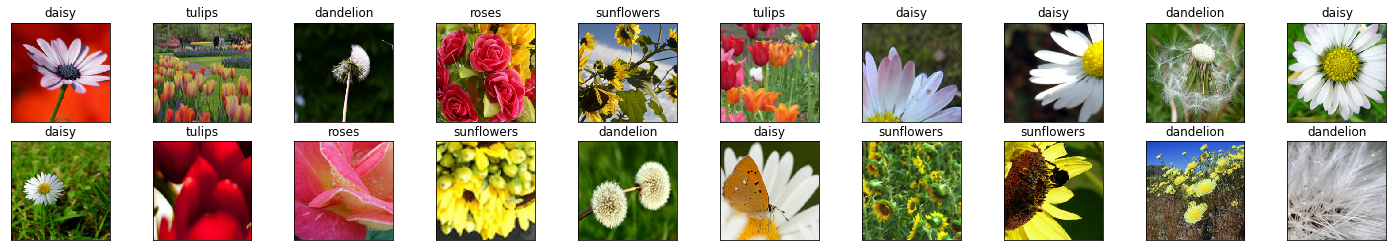

In [13]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

---
## Define the Model

To define a model for training we'll follow these steps:
1. Load in a pre-trained VGG16 model
2. "Freeze" all the parameters, so the net acts as a fixed feature extractor 
3. Remove the last layer
4. Replace the last layer with a linear classifier of our own

**Freezing simply means that the parameters in the pre-trained model will *not* change during training.**

In [14]:
# Load the pretrained model from pytorch
vgg16 = models.vgg16(pretrained=True)

# print out the model structure
print(vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/romeo/.cache/torch/checkpoints/vgg16-397923af.pth
100.0%


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [15]:
print(vgg16.classifier[6].in_features) 
print(vgg16.classifier[6].out_features) 


4096
1000


In [16]:
# Freeze training for all "features" layers
for param in vgg16.features.parameters():
    param.requires_grad = False
    

---
### Final Classifier Layer

Once you have the pre-trained feature extractor, you just need to modify and/or add to the final, fully-connected classifier layers. In this case, we suggest that you repace the last layer in the vgg classifier group of layers. 
> This layer should see as input the number of features produced by the portion of the network that you are not changing, and produce an appropriate number of outputs for the flower classification task.

You can access any layer in a pretrained network by name and (sometimes) number, i.e. `vgg16.classifier[6]` is the sixth layer in a group of layers named "classifier".

#### TODO: Replace the last fully-connected layer with one that produces the appropriate number of class scores.

In [18]:
vgg16.classifier[6]

Linear(in_features=4096, out_features=1000, bias=True)

In [19]:
import torch.nn as nn## TODO: add a last linear layer  that maps n_inputs -> 5 flower classes
## new layers automatically have requires_grad = True

vgg16.classifier[6] = nn.Linear(in_features=vgg16.classifier[6].in_features, out_features=len(classes))

# after completing your model, if GPU is available, move the model to GPU
if train_on_gpu:
    vgg16.cuda()

In [20]:
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### Specify [Loss Function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [Optimizer](http://pytorch.org/docs/stable/optim.html)

Below we'll use cross-entropy loss and stochastic gradient descent with a small learning rate. Note that the optimizer accepts as input _only_ the trainable parameters `vgg.classifier.parameters()`.

In [22]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent) and learning rate = 0.001
# we need to train only vgg16.classifier, because vgg16.features are frozen
optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

---
## Training

Here, we'll train the network.

> **Exercise:** So far we've been providing the training code for you. Here, I'm going to give you a bit more of a challenge and have you write the code to train the network. Of course, you'll be able to see my solution if you need help.

In [34]:
# number of epochs to train the model
n_epochs = 2

## TODO complete epoch and training batch loops
## These loops should update the classifier-weights of this model
## And track (and print out) the training loss over time

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):
    # keep track of training and validation loss
    train_loss = 0.0
    
    ###################
    # train the model #
    ###################
    twenty_batch_loss = 0.0
    vgg16.train()   
    for batch_i, (data, target) in enumerate(train_loader ):
        print('.', end='')
        
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        
        optimizer.zero_grad() # clear the gradients of all optimized variables
        output = vgg16(data) # forward
        loss = criterion(output, target) # loss
        loss.backward() # backward
        optimizer.step()  # perform a single optimization step (parameter update)
        
        # update training loss for batch size (batch size = data.size(0) )
        twenty_batch_loss += loss.item() 
        train_loss += loss.item() * data.size(0)
        
        if batch_i % 20 == 19:
            print(f'\nEpoch {epoch}, Batch {batch_i} loss: {twenty_batch_loss/20:.16f}')
            twenty_batch_loss = 0

    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    
    # print training/validation statistics 
    print('\nEpoch: {} \tTraining Loss: {:.6f}'.format(epoch, train_loss))
    
    # TODO: split in valid & test sets + save model if validation loss has decreased

....................
Epoch 1, Batch 19 loss: 0.7294950976967811
....................
Epoch 1, Batch 39 loss: 0.6264097750186920
....................
Epoch 1, Batch 59 loss: 0.6600156173110008
....................
Epoch 1, Batch 79 loss: 0.6700306549668312
....................
Epoch 1, Batch 99 loss: 0.6096007496118545
....................
Epoch 1, Batch 119 loss: 0.6020374193787574
....................
Epoch 1, Batch 139 loss: 0.6124475598335266
.................
Epoch: 1 	Training Loss: 0.646797
....................
Epoch 2, Batch 19 loss: 0.6358633562922478
....................
Epoch 2, Batch 39 loss: 0.6083574339747428
....................
Epoch 2, Batch 59 loss: 0.6223470658063889
....................
Epoch 2, Batch 79 loss: 0.6366501256823540
....................
Epoch 2, Batch 99 loss: 0.5698941752314568
....................
Epoch 2, Batch 119 loss: 0.5931482240557671
....................
Epoch 2, Batch 139 loss: 0.5396792531013489
.................
Epoch: 2 	Training Loss: 0.601

---
## Testing

Below you see the test accuracy for each flower class.

In [35]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(5))
class_total = list(0. for i in range(5))

vgg16.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = vgg16(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(5):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.592220

Test Accuracy of daisy: 83% (77/92)
Test Accuracy of dandelion: 92% (122/132)
Test Accuracy of roses: 76% (70/91)
Test Accuracy of sunflowers: 80% (81/101)
Test Accuracy of tulips: 69% (86/124)

Test Accuracy (Overall): 80% (436/540)


### Visualize Sample Test Results

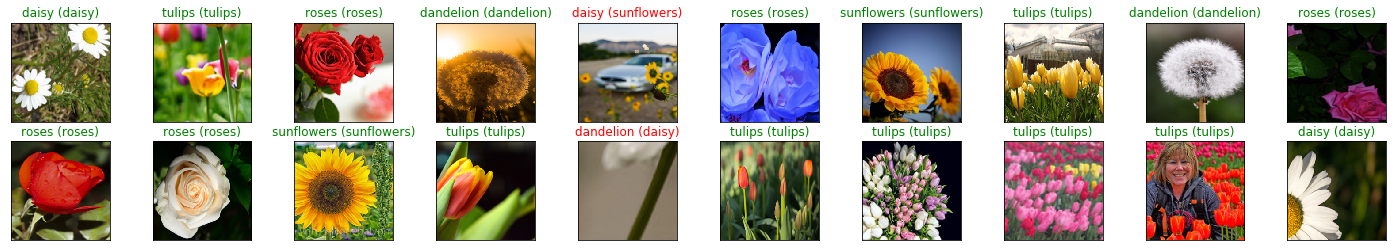

In [36]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = vgg16(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))